<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_1_2_1_Squared_Distance_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a "toy" notebook to show how to implement the algorithm explained in the Introductory chapter of the book "Supervised Learning with Quantum Computers". The algorithm is described in section 1.2.1 of the book. 

In [2]:
%%capture
#@title
#Installing qiskit standalone
!pip install imgaug==0.2.5

!pip install qiskit -U
!pip install pylatexenc

#Next lines for LaTeX
#!pip install latex
#!apt-get install cm-super
#!apt-get install dvipng 
#!apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

In [3]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import Aer
from qiskit import *

from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, array_to_latex
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np


In [5]:
#The state vector below contains the values from the table 1.3 of the Book
#IMPORTANT: Using this state vector "as is" does not work, as the order of bits in qiskit is from right to left (Less signifcant bit on the right)
#The next cell has the state vector transformed to the QisKit format

sv = np.array([0, 0.921, 0, 0.39, 0.141, 0, 0.99, 0, 0, 0.866, 0, 0.5, 0.866, 0, 0.5, 0])
sv_norm = sv/np.linalg.norm(sv)
print(sv_norm)

[0.         0.46048653 0.         0.1949943  0.07049794 0.
 0.49498552 0.         0.         0.43298734 0.         0.24999269
 0.43298734 0.         0.24999269 0.        ]


In [6]:
#The state vector below respects the Qiskit order of qbits...
#To get the correct results, USE THIS STATE VECTOR...
sv = np.array([ 0, 0, 0.141, 0.866, 0, 0, 0.99, 0.5, 0.921, 0.866, 0, 0, 0.39, 0.5, 0, 0])                         #   Original Order (Book): [0, 0.921, 0, 0.39, 0.141, 0, 0.99, 0, 0, 0.866, 0, 0.5, 0.866, 0, 0.5, 0]
sv_norm = sv/np.linalg.norm(sv)
print(sv_norm)

[0.         0.         0.07049794 0.43298734 0.         0.
 0.49498552 0.24999269 0.46048653 0.43298734 0.         0.
 0.1949943  0.24999269 0.         0.        ]


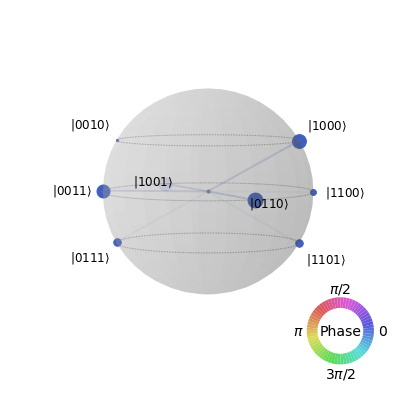

In [7]:
#Showing the amplitudes in the qsphere...
plot_state_qsphere(sv_norm)

nqubits: 4


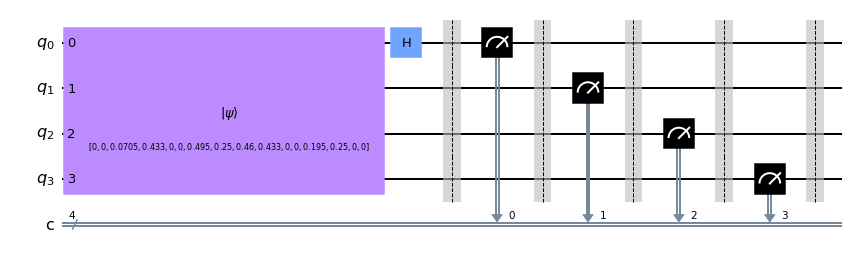

In [8]:
nqbits = int(np.sqrt(len(sv_norm)))
print(f"nqubits: {nqbits}")
qc = QuantumCircuit(nqbits, nqbits)
qc.initialize(sv_norm, [i for i in range(0, nqbits)])
qc.h(0)
qc.save_statevector("beforeMeasq0")
qc.measure(0,0)
qc.save_statevector("afterMeasq0")
qc.measure(1,1)
qc.save_statevector("afterMeasq1")
qc.measure(2,2)
qc.save_statevector("afterMeasq2")
qc.measure(3,3)
qc.save_statevector("afterMeasq3")

qc.draw("mpl")

In [ ]:
svsim = Aer.get_backend('aer_simulator_statevector') #Aer.get_backend('aer_simulator')
  
job = svsim.run(qc, shots=50000)
result = job.result()
svs = result.data(0)
display(array_to_latex(svs["beforeMeasq0"].data, prefix="\\text{Before Meas.   = }", max_size=20))
display(array_to_latex(svs["afterMeasq0"].data, prefix="\\text{After Meas. q0  = }", max_size=20))
display(array_to_latex(svs["afterMeasq1"].data, prefix="\\text{After Meas. q1  = }", max_size=20))
display(array_to_latex(svs["afterMeasq2"].data, prefix="\\text{After Meas. q2  = }", max_size=20))
display(array_to_latex(svs["afterMeasq3"].data, prefix="\\text{After Meas. q3  = }", max_size=20))
print(result.get_counts())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'1001': 18, '1101': 64, '0110': 13810, '0010': 6339, '1100': 5009, '1000': 20106, '0011': 3165, '0111': 1489}


In [ ]:
#remember: order   |q4q3q2q1>
#Only use the basis where q1=0 (according to algo) - discard the other amplitudes
#q4=0 means prob. of death
#q4=1 means prob. of surv.

all    = ['0000', '1000', '0100', '1100', '0010', '1010', '0110', '1110'] #all possible states where q1=0
death  = ['0000', '0100', '0010', '0110'] #q4=0 means prob. of death
surv   = ['1000', '1100', '1010', '1110'] #q4=1 means prob. of surv.

c = result.get_counts()

numTotal=0
numDeath=0
numSurv =0
for vs in c.keys():
  if vs in all:
    numTotal += c[vs]
  if vs in death:
    numDeath += c[vs]
  if vs in surv:
    numSurv += c[vs]

pDeath = numDeath/numTotal
pSurv  = numSurv/numTotal

print(f"Prob. Death: {pDeath:.4f}")
print(f"Prob. Surv:  {pSurv:.4f}")


Prob. Death: 0.4451
Prob. Surv:  0.5549
